In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# 2. Load the dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

In [61]:
# Pipeline: Scale → Polynomial (deg=2) → Ridge regression
model = Pipeline([
    ("scaler", StandardScaler()),                                   # scale features
    ("poly", PolynomialFeatures(degree=1, include_bias=False)),      # add quadratic terms
    ("ridge", Ridge(alpha=0.1, random_state=42))                   # Ridge regression
])

In [62]:
# 5-Fold cross‐validation evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_list, mse_list, rmse_list = [], [], []

print("----- 5-Fold CV (Polynomial deg=2 + Ridge) Results -----")

for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2   = r2_score(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    print(f"Fold {fold}: R² = {r2:.4f} | MSE = {mse:.4f} | RMSE = {rmse:.4f}")
# Average CV results
print("\n----- Average Metrics -----")
print(f"Mean R²   : {np.mean(r2_list):.4f}")
print(f"Mean MSE  : {np.mean(mse_list):.4f}")
print(f"Mean RMSE : {np.mean(rmse_list):.4f}")

----- 5-Fold CV (Polynomial deg=2 + Ridge) Results -----
Fold 1: R² = 0.5758 | MSE = 0.5559 | RMSE = 0.7456
Fold 2: R² = 0.6137 | MSE = 0.5277 | RMSE = 0.7264
Fold 3: R² = 0.6086 | MSE = 0.5093 | RMSE = 0.7136
Fold 4: R² = 0.6213 | MSE = 0.5049 | RMSE = 0.7105
Fold 5: R² = 0.5875 | MSE = 0.5552 | RMSE = 0.7451

----- Average Metrics -----
Mean R²   : 0.6014
Mean MSE  : 0.5306
Mean RMSE : 0.7283


In [63]:
# Full-fit: train on all data and evaluate
model.fit(X, y)
y_full = model.predict(X)

r2_full   = r2_score(y, y_full)
mse_full  = mean_squared_error(y, y_full)
rmse_full = np.sqrt(mse_full)

print("\n----- Full-fit Results -----")
print(f"R²   = {r2_full:.4f}")
print(f"MSE  = {mse_full:.4f}")
print(f"RMSE = {rmse_full:.4f}")


----- Full-fit Results -----
R²   = 0.6062
MSE  = 0.5243
RMSE = 0.7241


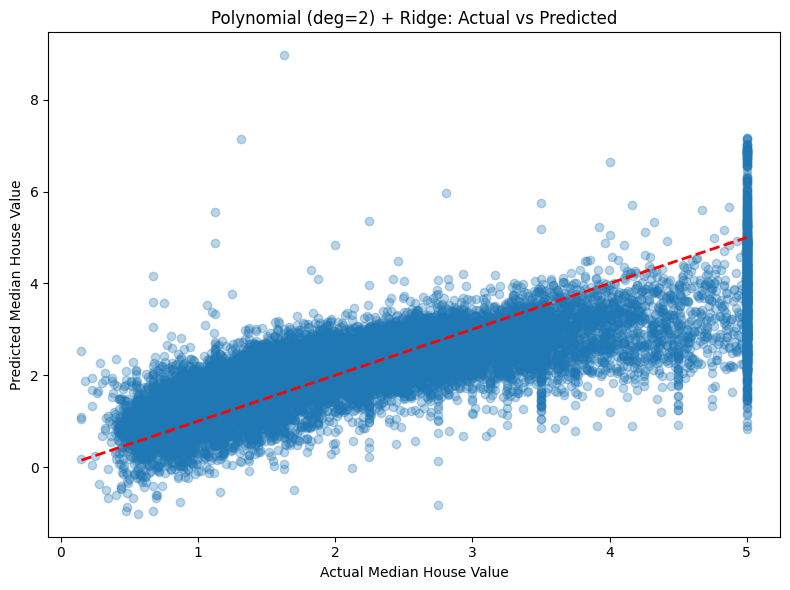

In [64]:
# Visualizations Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_full, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Polynomial (deg=2) + Ridge: Actual vs Predicted")
plt.tight_layout()
plt.show()

In [66]:
# Example for prediction
example = {
    'MedInc':      7.5,     # median income (10k USD)
    'HouseAge':    30.0,    # median house age (years)
    'AveRooms':    6.0,     # average rooms per household
    'AveBedrms':   1.2,     # average bedrooms per household
    'Population':  1500.0,  # block population
    'AveOccup':    3.0,     # average occupants per household
    'Latitude':    34.0,    # latitude
    'Longitude': -118.5     # longitude
}

example_df = pd.DataFrame([example])
prediction = model.predict(example_df)[0]
print(f"\nModel prediction for manual example: {prediction:.4f} (10k usd)")



Model prediction for manual example: 3.8943 (10k usd)
